In [5]:
import pandas as pd
import numpy as np
from lib import *
import gc
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
calendar = pd.read_csv('Data/calendar.csv')
sell_prices = pd.read_csv('Data/sell_prices.csv')
sales_train_validation = pd.read_csv('Data/sales_train_validation.csv')
submission = pd.read_csv('Data/sample_submission.csv')

In [4]:
# Reduce memory size
calendar = reduce_mem(calendar)
sell_prices = reduce_mem(sell_prices)
sales_train_validation = reduce_mem(sales_train_validation)
submission = reduce_mem(submission)

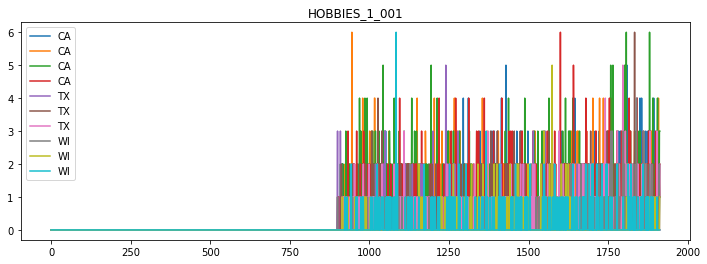

In [12]:
item_id = 'HOBBIES_1_001'
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.plot(sales_train_validation.loc[sales_train_validation['item_id'] == item_id].iloc[i, 6:].values,
             label= sales_train_validation.loc[sales_train_validation['item_id'] == item_id].iloc[i, 5]);
plt.title(item_id)
plt.legend();

In [18]:
# info in specific store 
assigned_store = 'CA_1'
store_sales = sales_train_validation.loc[sales_train_validation['store_id'] == assigned_store]
pd.crosstab(store_sales['cat_id'], store_sales['dept_id'])

dept_id,FOODS_1,FOODS_2,FOODS_3,HOBBIES_1,HOBBIES_2,HOUSEHOLD_1,HOUSEHOLD_2
cat_id,,,,,,,
FOODS,216,398,823,0,0,0,0
HOBBIES,0,0,0,416,149,0,0
HOUSEHOLD,0,0,0,0,0,532,515


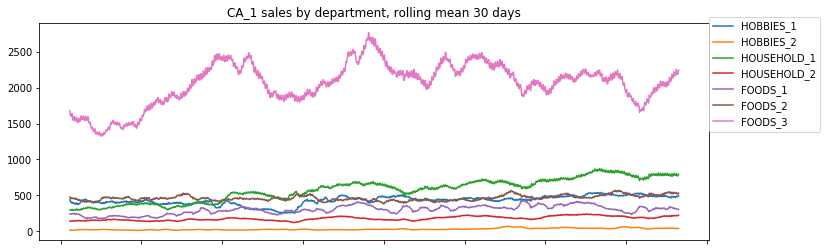

In [19]:
# info in specific store - demand
plt.figure(figsize=(12, 4))
for d in store_sales['dept_id'].unique():
    store_sales_ = store_sales.loc[store_sales['dept_id'] == d]
    store_sales_.iloc[:, 6:].sum().rolling(30).mean().plot(label=d)
plt.title(assigned_store + ' sales by department, rolling mean 30 days')
plt.legend(loc=(1.0, 0.5));

/Users/william/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


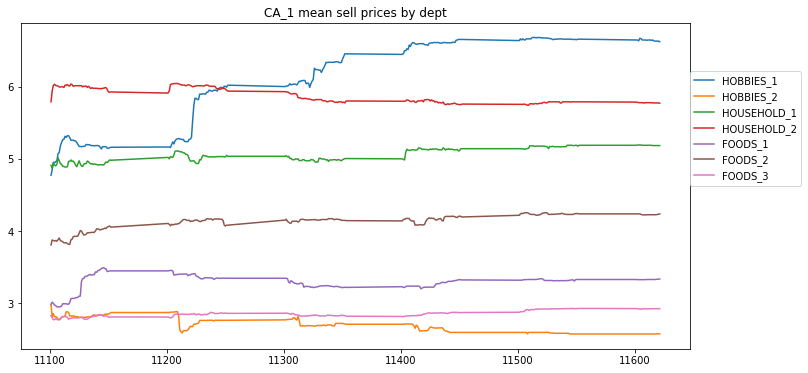

In [20]:
# info in specific store - price
store_prices = sell_prices.loc[sell_prices['store_id'] == assigned_store]
store_prices['dept_id'] = store_prices['item_id'].apply(lambda x: x[:-4])
plt.figure(figsize=(12, 6))

for d in store_prices['dept_id'].unique():
    small_df = store_prices.loc[store_prices['dept_id'] == d]
    grouped = small_df.groupby(['wm_yr_wk'])['sell_price'].mean()
    plt.plot(grouped.index, grouped.values, label=d)
plt.legend(loc=(1.0, 0.5))
plt.title(assigned_store + ' mean sell prices by dept');

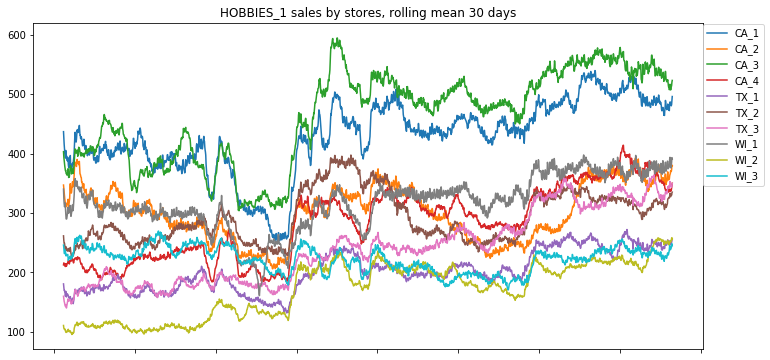

In [21]:
# Department info - demand
assigned_dept_id = 'HOBBIES_1'
dept_sales = sales_train_validation.loc[sales_train_validation['dept_id'] == assigned_dept_id]
plt.figure(figsize=(12, 6))
for d in dept_sales['store_id'].unique():
    store_sales = dept_sales.loc[dept_sales['store_id'] == d]
    store_sales.iloc[:, 6:].sum().rolling(30).mean().plot(label=d)
plt.title(assigned_dept_id + ' sales by stores, rolling mean 30 days')
plt.legend(loc=(1.0, 0.5));

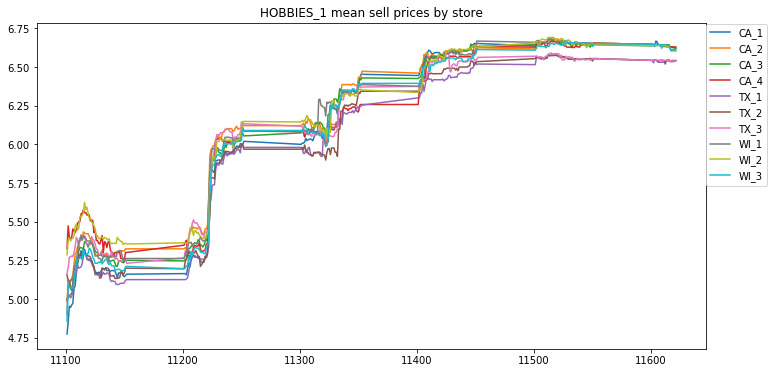

In [22]:
# Department info - price
dept_prices = sell_prices.loc[sell_prices['item_id'].str.contains(assigned_dept_id)]
plt.figure(figsize=(12, 6))
for d in dept_prices['store_id'].unique():
    small_df = dept_prices.loc[dept_prices['store_id'] == d]
    grouped = small_df.groupby(['wm_yr_wk'])['sell_price'].mean()
    plt.plot(grouped.index, grouped.values, label=d)
plt.legend(loc=(1.0, 0.5))
plt.title(assigned_dept_id + ' mean sell prices by store');